In [1]:
import numpy as np
import time 

In [2]:
## define node strucutre
class Node:
    def __init__(self,parent,position):
        self.parent = parent
        self.position = position
        self.f = 0
        self.g = 0
        self.h = 0
        
    def __lt__(self,other):
        return self.f <= other.f

In [3]:
## create a blank grid
## use a* path to walk the walk --> get path
## check the path, if path is unwalkable, start from the 
## first un-walkable spot, and use a* to find the walk 
def blank_space_a_star(grid,start,end,cost):
    ## turn Nodify start,end point
    start_node = Node(None,start)
    end_node = Node(None,end)
    
    ## create two list --> open_lst, and close_lst 
    ## open_lst: store children nodes 
    ## close_lst: store path node --> path_finder
    open_lst = []
    close_lst = []
    
    open_lst.append(start_node)
    current_node = open_lst[0]
    
    n_row,n_col = np.shape(grid)
    n_row = n_row -1
    n_col = n_col -1
    
    ## put start node into open_lst
    ## loop control, if open lst is not empty
    while len(open_lst)>0:
        
        ## sort open_lst to get the min f val node 
        ## pop that node and set it to current_node
        ## if current_node == end goal, return
            ## else get current_node children
            ## check its children 1. valid? 2. walkable
                ## if yes, append to open_lst 
                ## else, continue
        
        
        open_lst.sort()
#         print("open_lst after sort",[x.position for x in open_lst])
#         print("f value",[x.f for x in open_lst])
        current_node = open_lst.pop(0)
        close_lst.append(current_node)
        if current_node.position == end_node.position:
            return path_finder(current_node,grid,start_node,end_node)
        ## get current_node children
        child_loc = [
            [0,-1], ## moving left
            [0,1],  ## moving right
            [1,0],  ## moving down
            [-1,0] ## moving up
        ]
        
        for child in child_loc:
            ## check if child in open or close lst 
            ## check if child is valid 
            ## check if child is walkale
            ## add node to the open_lst
            mving_child = [current_node.position[0]+child[0],current_node.position[1]+child[1]]
            if mving_child not in [x.position for x in open_lst]:
                if mving_child not in [y.position for y in close_lst]:
                    if 0<=mving_child[0] <= n_row and 0<=mving_child[1] <=n_col:
                        if grid[mving_child[0]][mving_child[1]] != 1:
                            ## create new node
                            mving_node = Node(current_node,mving_child)
                            open_lst.append(mving_node)
        
        
        ## caluclate f,g,h
        ## heuristic: manhattan 
        for children in open_lst:
            children.g = children.g + cost 
            children.h = abs(children.position[0]-end_node.position[0])+ abs(children.position[1]-end_node.position[1])
            children.f = children.g + children.h
            
#         print("close_lst",[x.position for x in close_lst])
#         print("open_lst",[x.position for x in open_lst])
#         print("f value",[x.f for x in open_lst])
#         print("current_node",current_node.position)
#         print("---------------------")
    
    return path_finder(current_node,grid,start_node,end_node)

In [4]:

# blank_route = [[0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [4, 1], [4, 2], [4, 3], [4, 4]]
def repeated_a_star(grid,start,end,cost,blank_route):
    return_lst = {}
    restart_block = []
    for step in blank_route:
        if grid[step[0]][step[1]] == 0:
            restart_block.append(step) 
        else:
            break
#     restart_f = restart_block[1:]
    for start_point in restart_block:
        final_lst = []
        end_index = restart_block.index(start_point)
        if end_index != 0:
            prev_lst = restart_block[0:end_index]
        else:
            prev_lst = []
#         print("prev_lst",prev_lst)
        start_time = time.time()
        repeated_a_result = search(grid,start_point,end,cost)
        end_time = time.time()
        total_time = end_time - start_time
#         print("prev_lst",prev_lst)
#         print("repeated_a_result",repeated_a_result)
        for x in prev_lst:
            final_lst.append(x)
        if repeated_a_result != "Path is not found":
            for y in repeated_a_result:
                final_lst.append(y)
        else:
            final_lst = None
#         print(final_lst)
        print("current index",restart_block.index(start_point))
        print("time",total_time)
        print("current final path",final_lst)
        return_lst[total_time] = final_lst
    return return_lst
            
    

In [5]:
    
    
## define search function 
def search(grid,start,end,cost):
    ## turn Nodify start,end point
    start_node = Node(None,start)
    end_node = Node(None,end)
    
    ## create two list --> open_lst, and close_lst 
    ## open_lst: store children nodes 
    ## close_lst: store path node --> path_finder
    open_lst = []
    close_lst = []
    
    open_lst.append(start_node)
    current_node = open_lst[0]
    
    n_row,n_col = np.shape(grid)
    n_row = n_row -1
    n_col = n_col -1
    
    ## put start node into open_lst
    ## loop control, if open lst is not empty
    while len(open_lst)>0:
        
        ## sort open_lst to get the min f val node 
        ## pop that node and set it to current_node
        ## if current_node == end goal, return
            ## else get current_node children
            ## check its children 1. valid? 2. walkable
                ## if yes, append to open_lst 
                ## else, continue
        
        
        open_lst.sort()
#         print("open_lst after sort",[x.position for x in open_lst])
#         print("f value",[x.f for x in open_lst])
        current_node = open_lst.pop(0)
        close_lst.append(current_node)
        if current_node.position == end_node.position:
            return path_finder(current_node,grid,start_node,end_node)
        ## get current_node children
        child_loc = [
            [0,-1], ## moving left
            [0,1],  ## moving right
            [1,0],  ## moving down
            [-1,0] ## moving up
        ]
        
        for child in child_loc:
            ## check if child in open or close lst 
            ## check if child is valid 
            ## check if child is walkale
            ## add node to the open_lst
            mving_child = [current_node.position[0]+child[0],current_node.position[1]+child[1]]
            if mving_child not in [x.position for x in open_lst]:
                if mving_child not in [y.position for y in close_lst]:
                    if 0<=mving_child[0] <= n_row and 0<=mving_child[1] <=n_col:
                        if grid[mving_child[0]][mving_child[1]] != 1:
                            ## create new node
                            mving_node = Node(current_node,mving_child)
                            open_lst.append(mving_node)
        
        
        ## caluclate f,g,h
        ## heuristic: manhattan 
        for children in open_lst:
            children.g = children.g + cost
#             print("children position",children.position)
#             print("children position [0]",children.position[0])
            children.h = abs(children.position[0]-end_node.position[0])+ abs(children.position[1]-end_node.position[1])
            children.f = children.g + children.h
            
#         print("close_lst",[x.position for x in close_lst])
#         print("open_lst",[x.position for x in open_lst])
#         print("f value",[x.f for x in open_lst])
#         print("current_node",current_node.position)
#         print("---------------------")
    
    return path_finder(current_node,grid,start_node,end_node)
        

In [6]:
def path_finder(current_node,grid,start_node,end_node):
    path = []
    
    current = current_node
    
    while current:
        
        path.append(current.position)
        
        current = current.parent
        
    path = path[::-1]
    
    if path[0] == start_node.position and path[-1] == end_node.position:
        return path
    else:
        return "Path is not found"

In [7]:
import random

## maze function --> 101 x 101 
## '0' walkable
## '1' block
def create_maze(nx,ny,p_val):
    ##empty maze, all values are 0
    maze = [[0 for j in range(nx)]for i in range(ny)]
    
    ## loop each cell, calculate p value, resign val
    for i in range(nx):
        for j in range(ny):
            prob_test_for_each_blck = random.uniform(0, 1)
            if prob_test_for_each_blck <= p_val:
                maze[i][j] = 1 
    maze[0][0] = 0
    maze[nx-1][ny-1] = 0
    return maze


In [8]:
def q8(nx,ny,p_val):
    return_result = []
    pass_lst = []
    avg_solv = []
    start = [0,0]
    end = [nx-1,ny-1]
    cost = 1
    maze = [[0 for j in range(nx)]for i in range(ny)]
    blank_route = blank_space_a_star(maze,start,end,cost)
    grid = create_maze(nx,ny,p_val)
    repeated_result = repeated_a_star(grid,start,end,cost,blank_route)
    print("repeated_result--->",repeated_result)
        
    return repeated_result


In [22]:
if __name__ == "__main__":
    cost = 1
    result_lst_5 = []
    result_lst_20 = []
    result_lst_50 = []
    result_lst_100 = []
    
    result_lst_5.append(q8(nx=5,ny=5,p_val=0.2))
    result_lst_20.append(q8(nx=20,ny=20,p_val=0.2))
    result_lst_50.append(q8(nx=50,ny=50,p_val=0.2))
    result_lst_100.append(q8(nx=100,ny=100,p_val=0.2))
    result_5 = result_lst_5[0]
    result_20 = result_lst_20[0]
    result_50 = result_lst_50[0]
    result_100 = result_lst_100[0]
    
#     print(result_lst)

current index 0
time 0.0001800060272216797
current final path [[0, 0], [1, 0], [1, 1], [2, 1], [2, 2], [2, 3], [3, 3], [4, 3], [4, 4]]
current index 1
time 0.0004401206970214844
current final path [[0, 0], [1, 0], [1, 1], [2, 1], [2, 2], [2, 3], [3, 3], [4, 3], [4, 4]]
repeated_result---> {0.0001800060272216797: [[0, 0], [1, 0], [1, 1], [2, 1], [2, 2], [2, 3], [3, 3], [4, 3], [4, 4]], 0.0004401206970214844: [[0, 0], [1, 0], [1, 1], [2, 1], [2, 2], [2, 3], [3, 3], [4, 3], [4, 4]]}
current index 0
time 0.005101919174194336
current final path [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [1, 4], [2, 4], [2, 5], [3, 5], [4, 5], [5, 5], [6, 5], [7, 5], [8, 5], [9, 5], [10, 5], [11, 5], [12, 5], [13, 5], [14, 5], [15, 5], [16, 5], [17, 5], [17, 6], [18, 6], [19, 6], [19, 7], [19, 8], [19, 9], [19, 10], [19, 11], [19, 12], [19, 13], [18, 13], [18, 14], [18, 15], [18, 16], [19, 16], [19, 17], [19, 18], [19, 19]]
current index 1
time 0.00485992431640625
current final path [[0, 0], [1, 0], [1, 1], [0

current index 0
time 0.10322093963623047
current final path [[0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0], [9, 1], [10, 1], [11, 1], [12, 1], [13, 1], [14, 1], [15, 1], [15, 2], [15, 3], [15, 4], [16, 4], [17, 4], [18, 4], [19, 4], [20, 4], [20, 5], [21, 5], [21, 6], [22, 6], [23, 6], [24, 6], [24, 5], [25, 5], [26, 5], [27, 5], [27, 6], [28, 6], [29, 6], [30, 6], [31, 6], [32, 6], [33, 6], [34, 6], [35, 6], [36, 6], [37, 6], [37, 7], [38, 7], [38, 8], [38, 9], [39, 9], [40, 9], [40, 10], [41, 10], [42, 10], [43, 10], [43, 11], [43, 12], [43, 13], [44, 13], [45, 13], [46, 13], [47, 13], [48, 13], [49, 13], [50, 13], [51, 13], [52, 13], [53, 13], [54, 13], [54, 14], [54, 15], [55, 15], [56, 15], [56, 16], [57, 16], [58, 16], [59, 16], [59, 17], [60, 17], [61, 17], [62, 17], [63, 17], [64, 17], [65, 17], [65, 18], [66, 18], [67, 18], [68, 18], [68, 19], [68, 20], [68, 21], [68, 22], [69, 22], [70, 22], [71, 22], [72, 22], [73, 22], [74, 22], [75, 22], [7

current index 6
time 0.08060789108276367
current final path [[0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0], [9, 1], [10, 1], [11, 1], [12, 1], [13, 1], [14, 1], [15, 1], [15, 2], [15, 3], [15, 4], [16, 4], [17, 4], [18, 4], [19, 4], [20, 4], [20, 5], [21, 5], [21, 6], [22, 6], [23, 6], [24, 6], [24, 5], [25, 5], [26, 5], [27, 5], [27, 6], [28, 6], [29, 6], [30, 6], [31, 6], [32, 6], [33, 6], [34, 6], [35, 6], [36, 6], [37, 6], [37, 7], [38, 7], [38, 8], [38, 9], [39, 9], [40, 9], [40, 10], [41, 10], [42, 10], [43, 10], [43, 11], [43, 12], [43, 13], [44, 13], [45, 13], [46, 13], [47, 13], [48, 13], [49, 13], [50, 13], [51, 13], [52, 13], [53, 13], [54, 13], [54, 14], [54, 15], [55, 15], [56, 15], [56, 16], [57, 16], [58, 16], [59, 16], [59, 17], [60, 17], [61, 17], [62, 17], [63, 17], [64, 17], [65, 17], [65, 18], [66, 18], [67, 18], [68, 18], [68, 19], [68, 20], [68, 21], [68, 22], [69, 22], [70, 22], [71, 22], [72, 22], [73, 22], [74, 22], [75, 22], [7

In [62]:
repeat_res_5 = {}
a_star_5 = dict(list(result_5.items())[:1])
replan_5 = min(dict(list(result_5.items())[1:]).keys())
repeat_res_5[replan_5]=result_5[replan_5]
repeat_res_5

repeat_res_20 = {}
a_star_20 = dict(list(result_20.items())[:1])
replan_20 = min(dict(list(result_20.items())[1:]).keys())
repeat_res_20[replan_20]=result_20[replan_20]
repeat_res_20

repeat_res_50 = {}
a_star_50 = dict(list(result_50.items())[:1])
replan_50 = min(dict(list(result_50.items())[1:]).keys())
repeat_res_50[replan_50]=result_50[replan_50]
repeat_res_50

repeat_res_100 = {}
a_star_100 = dict(list(result_100.items())[:1])
replan_100 = min(dict(list(result_100.items())[1:]).keys())
repeat_res_100[replan_100]=result_100[replan_100]
repeat_res_100

a_star_final = [list(a_star_5.keys())[0],list(a_star_20.keys())[0],list(a_star_50.keys())[0],list(a_star_100.keys())[0]]
repeat_final = [list(repeat_res_5.keys())[0],list(repeat_res_20.keys())[0],list(repeat_res_50.keys())[0],list(repeat_res_100.keys())[0]]


In [79]:
a_star_5 = dict(list(result_5.items())[:1])
replan_5 = dict(list(result_5.items())[1:])
result_len5 = 0
for x in replan_5:
    if len(replan_5[x]) > result_len5:
        result_len5 = len(replan_5[x])
    else:
        continue
print("repeat result distance",result_len5)
result_a_5 = len(list(a_star_5.values())[0])
print("repeat a_star distance",result_a_5)

repeat result distance 9
repeat a_star distance 9


In [80]:
a_star_20 = dict(list(result_20.items())[:1])
replan_20 = dict(list(result_20.items())[1:])

result_len20 = 0
for x in replan_20:
    if len(replan_20[x]) > result_len20:
        result_len20 = len(replan_20[x])
    else:
        continue
print("repeat result distance",result_len20 )
result_a_20 = len(list(a_star_20.values())[0])
print("repeat a_star distance",result_a_20)

repeat result distance 45
repeat a_star distance 41


In [81]:
a_star_50 = dict(list(result_50.items())[:1])
replan_50 = dict(list(result_50.items())[1:])
result_len50 = 0
for x in replan_50:
    if len(replan_50[x]) > result_len50:
        result_len50 = len(replan_50[x])
    else:
        continue
print("repeat result distance",result_len50)
result_a_50 = len(list(a_star_50.values())[0])
print("repeat a_star distance",result_a_50)

repeat result distance 117
repeat a_star distance 115


In [82]:
a_star_100 = dict(list(result_100.items())[:1])
replan_100 = dict(list(result_100.items())[1:])
result_len100 = 0
for x in replan_100:
    if len(replan_100[x]) > result_len100:
        result_len100 = len(replan_100[x])
    else:
        continue
print("repeat result distance",result_len100)
result_a_100 = len(list(a_star_100.values())[0])
print("repeat a_star distance",result_a_100)

repeat result distance 235
repeat a_star distance 235


In [65]:
replan_50

0.03577613830566406

In [27]:
repeat_res_20 = {}
a_star_20 = dict(list(result_20.items())[:1])
replan_20 = min(dict(list(result_20.items())[1:]).keys())
repeat_res_20[replan_20]=result_20[replan_20]
repeat_res_20

repeat_res_50 = {}
a_star_50 = dict(list(result_50.items())[:1])
replan_50 = min(dict(list(result_50.items())[1:]).keys())
repeat_res_50[replan_50]=result_50[replan_50]
repeat_res_50

repeat_res_100 = {}
a_star_100 = dict(list(result_100.items())[:1])
replan_100 = min(dict(list(result_100.items())[1:]).keys())
repeat_res_100[replan_100]=result_100[replan_100]
repeat_res_100

a_star_final = [list(a_star_5.keys())[0],list(a_star_20.keys())[0],list(a_star_50.keys())[0],list(a_star_100.keys())[0]]
repeat_final = [list(repeat_res_5.keys())[0],list(repeat_res_20.keys())[0],list(repeat_res_50.keys())[0],list(repeat_res_100.keys())[0]]

In [84]:
a_star_5 = dict(list(result_5.items())[:1])
replan_5 = dict(list(result_5.items())[1:])
result_len5 = 0
for x in replan_5:
    if len(replan_5[x]) > result_len5:
        result_len5 = len(replan_5[x])
    else:
        continue
print("repeat result distance",result_len5)
result_a_5 = len(list(a_star_5.values())[0])
print("repeat a_star distance",result_a_5)


a_star_20 = dict(list(result_20.items())[:1])
replan_20 = dict(list(result_20.items())[1:])

result_len20 = 0
for x in replan_20:
    if len(replan_20[x]) > result_len20:
        result_len20 = len(replan_20[x])
    else:
        continue
print("repeat result distance",result_len20 )
result_a_20 = len(list(a_star_20.values())[0])
print("repeat a_star distance",result_a_20)


a_star_50 = dict(list(result_50.items())[:1])
replan_50 = dict(list(result_50.items())[1:])
result_len50 = 0
for x in replan_50:
    if len(replan_50[x]) > result_len50:
        result_len50 = len(replan_50[x])
    else:
        continue
print("repeat result distance",result_len50)
result_a_50 = len(list(a_star_50.values())[0])
print("repeat a_star distance",result_a_50)

a_star_100 = dict(list(result_100.items())[:1])
replan_100 = dict(list(result_100.items())[1:])
result_len100 = 0
for x in replan_100:
    if len(replan_100[x]) > result_len100:
        result_len100 = len(replan_100[x])
    else:
        continue
print("repeat result distance",result_len100)
result_a_100 = len(list(a_star_100.values())[0])
print("repeat a_star distance",result_a_100)

a_star_dis_final = [result_a_5,result_a_20,result_a_50,result_a_100]
result_len_final =[result_len5,result_len20,result_len50,result_len100]

repeat result distance 9
repeat a_star distance 9
repeat result distance 45
repeat a_star distance 41
repeat result distance 117
repeat a_star distance 115
repeat result distance 235
repeat a_star distance 235


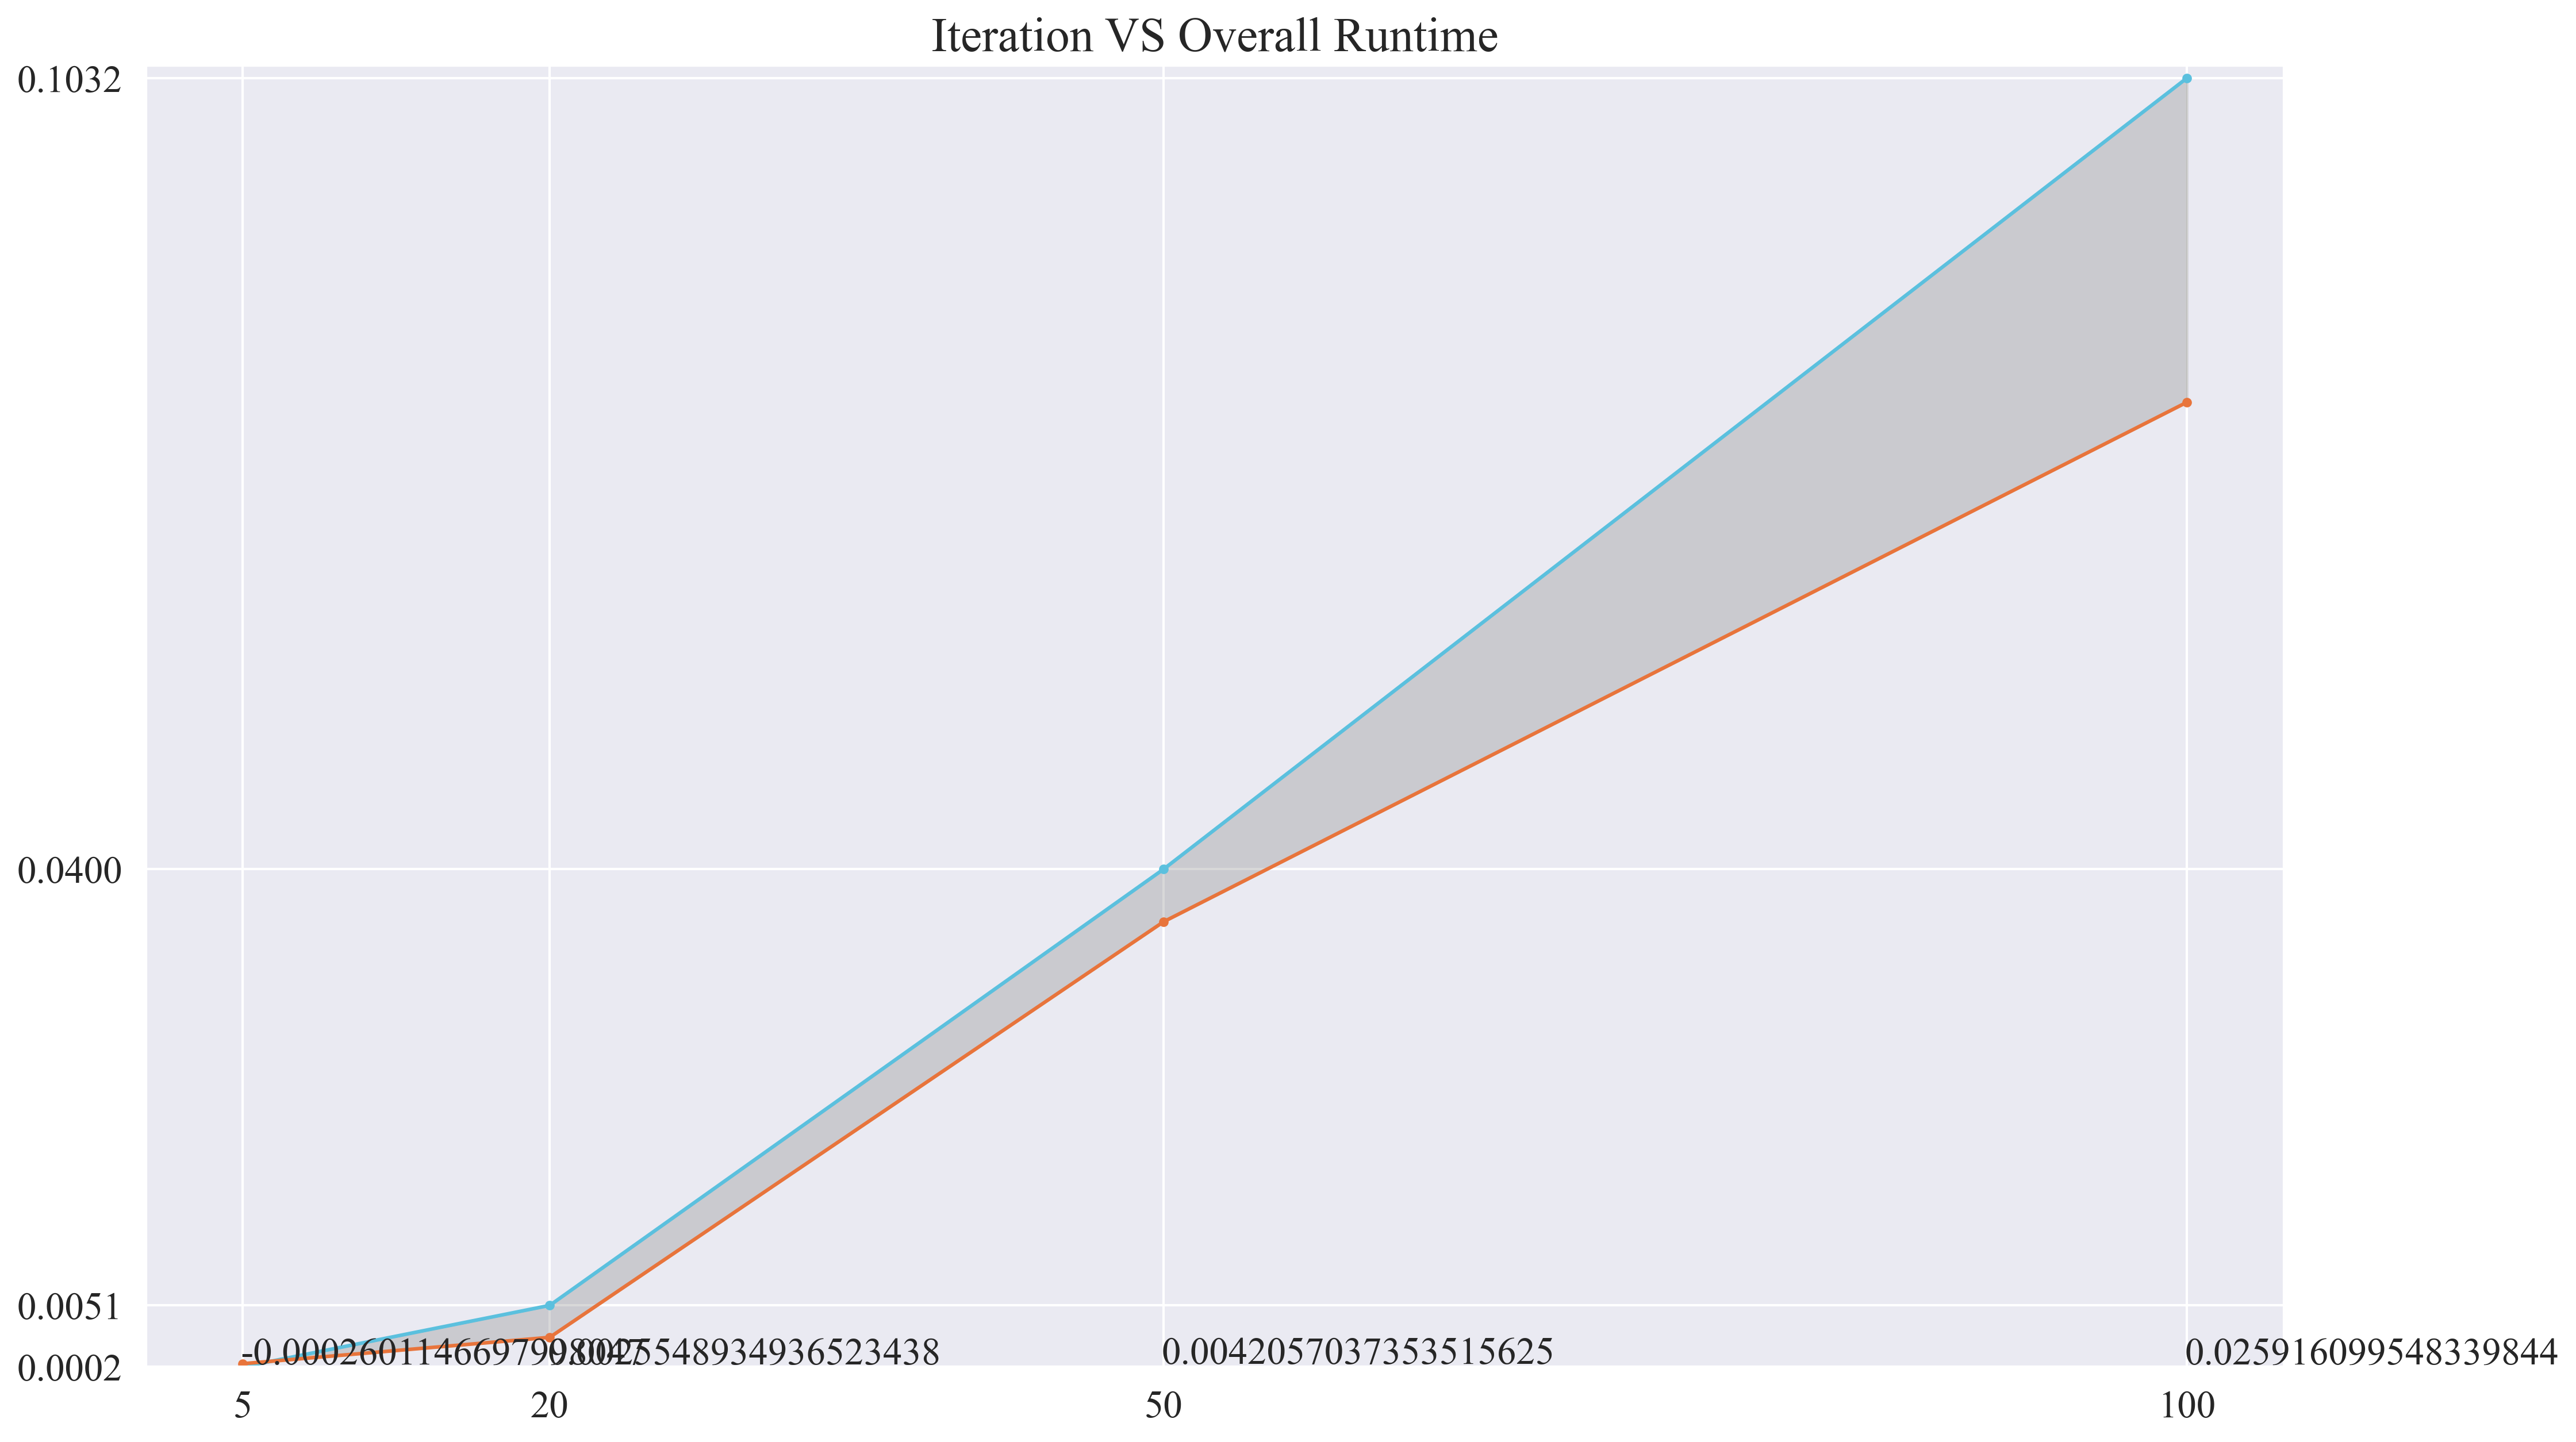

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(font='Times New Roman')

d = {'Grid_width'  : [5, 20, 50, 100],
     'a_star_final'  : a_star_final,
     'repeat_final': repeat_final}

df = pd.DataFrame(d)

male = df['a_star_final'].tolist()
female = df['repeat_final'].tolist()
year = df['Grid_width'].tolist()
ymax = max(male)
ymin = min(female)
fig = plt.figure(figsize=(16,10), dpi=300)

# ymin*0.99 should be changed according to the dataset
for ii in range(len(male)):
    plt.text(year[ii]-0.1, ymin*0.99, male[ii]-female[ii], size=16)
##BLue
plt.plot(year, male, marker=".", color="#5bc0de")
##red
plt.plot(year, female, marker=".", color="#E8743B")
plt.ylim([ymin*0.985, ymax*1.01])
plt.fill_between(year, male, female, color="grey", alpha=0.3)
plt.yticks(male, size=16)
plt.xticks(year, size=16)
plt.title("Iteration VS Overall Runtime", fontsize=20)
plt.show()

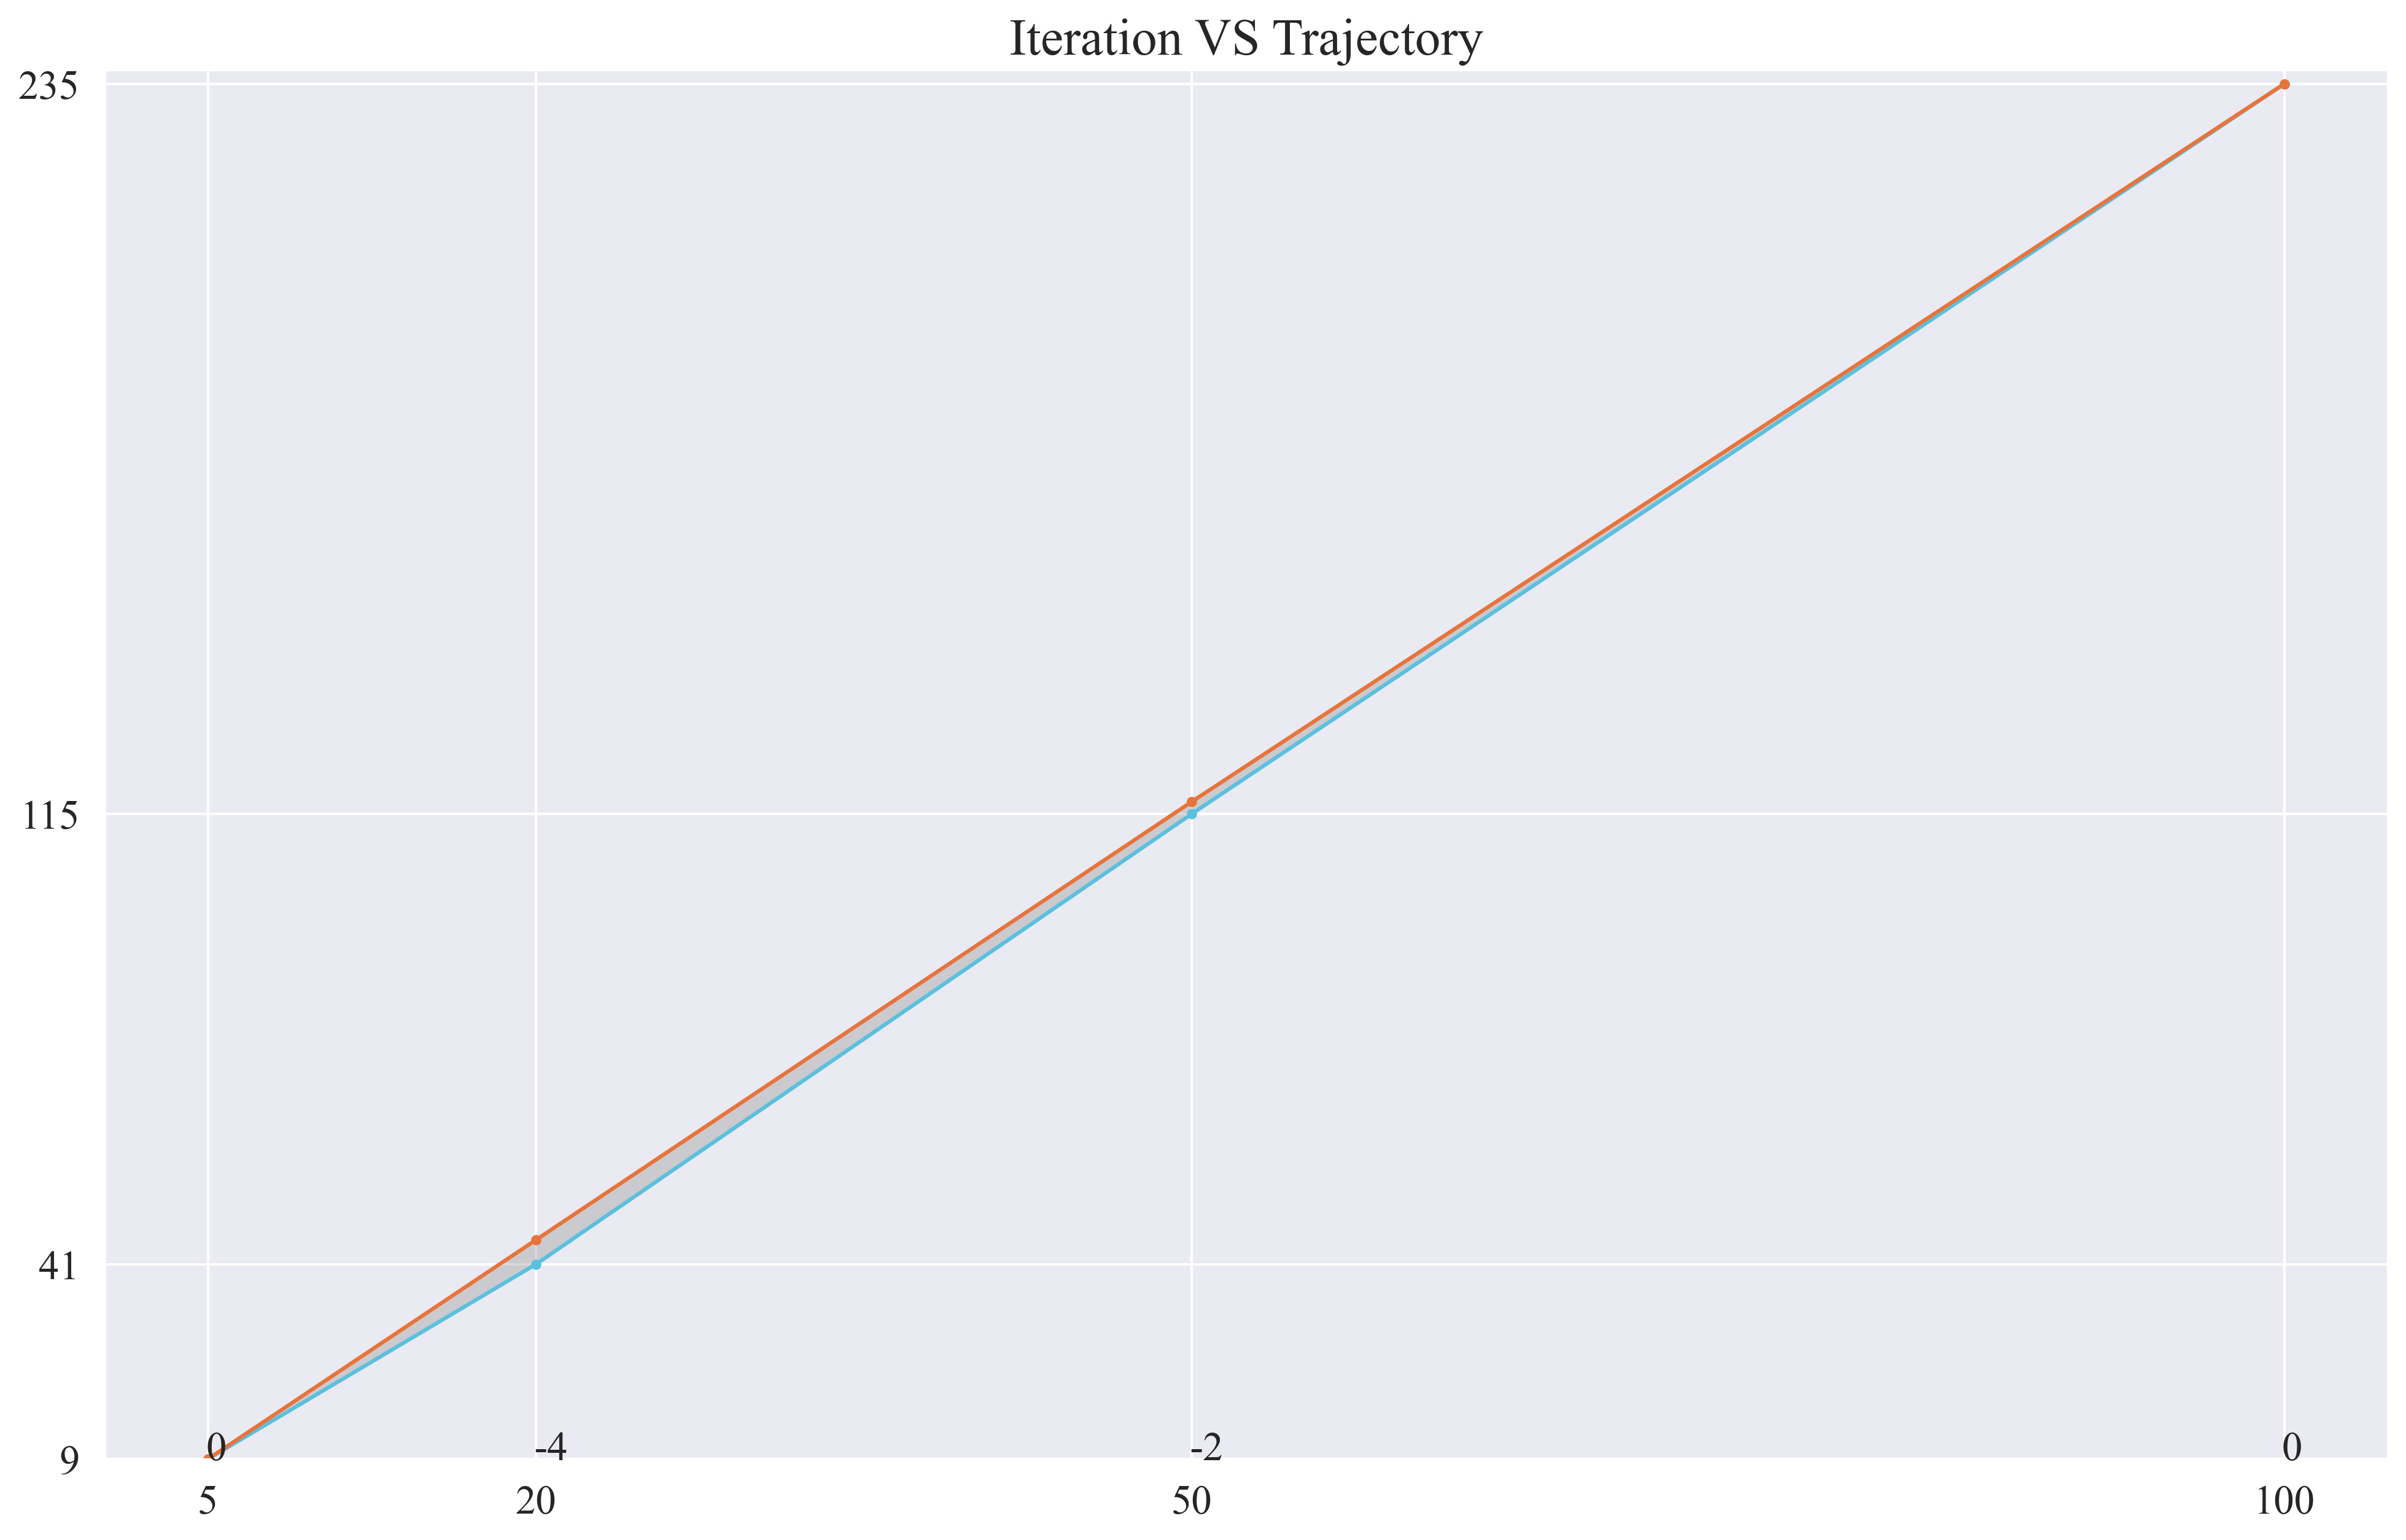

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(font='Times New Roman')

d = {'Grid_width'  : [5, 20, 50, 100],
     'a_star_dis_final'  : a_star_dis_final,
     'result_len_final': result_len_final}

df = pd.DataFrame(d)

male = df['a_star_dis_final'].tolist()
female = df['result_len_final'].tolist()
year = df['Grid_width'].tolist()
ymax = max(male)
ymin = min(female)
fig = plt.figure(figsize=(16,10), dpi=300)

# ymin*0.99 should be changed according to the dataset
for ii in range(len(male)):
    plt.text(year[ii]-0.1, ymin*0.99, male[ii]-female[ii], size=16)
##BLue
plt.plot(year, male, marker=".", color="#5bc0de")
##red
plt.plot(year, female, marker=".", color="#E8743B")
plt.ylim([ymin*0.985, ymax*1.01])
plt.fill_between(year, male, female, color="grey", alpha=0.3)
plt.yticks(male, size=16)
plt.xticks(year, size=16)
plt.title("Iteration VS Trajectory", fontsize=20)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

x = a_star_final
y = repeat_final

fig, ax = plt.subplots()
ax.set_title("Run Time vs Length (when iteration = 5)", fontsize='16')
ax.plot(y, x)
# plt.set_title('Run Time Between Three Functions')
ax.xaxis.set_label_text("Run Time",fontsize='13')
ax.yaxis.set_label_text("Length",fontsize='13')
plt.grid()
plt.show()

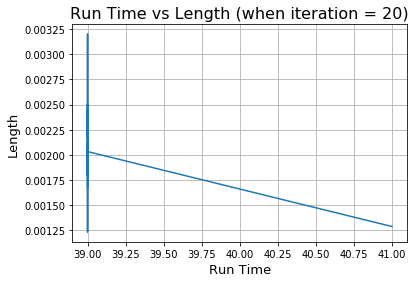

In [270]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [float(x) for x in result_20.keys()]
y = [len(y) for y in result_20.values()]

fig, ax = plt.subplots()
ax.set_title("Run Time vs Length (when iteration = 20)", fontsize='16')
ax.plot(y, x)
# plt.set_title('Run Time Between Three Functions')
ax.xaxis.set_label_text("Run Time",fontsize='13')
ax.yaxis.set_label_text("Length",fontsize='13')
plt.grid()
plt.show()

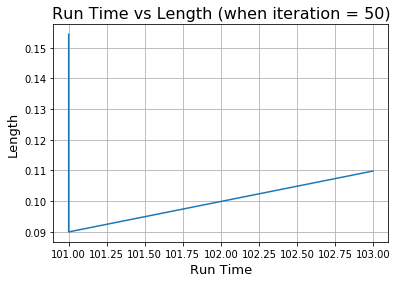

In [271]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [float(x) for x in result_50.keys()]
y = [len(y) for y in result_50.values()]

fig, ax = plt.subplots()
ax.set_title("Run Time vs Length (when iteration = 50)", fontsize='16')
ax.plot(y, x)
# plt.set_title('Run Time Between Three Functions')
ax.xaxis.set_label_text("Run Time",fontsize='13')
ax.yaxis.set_label_text("Length",fontsize='13')
plt.grid()
plt.show()

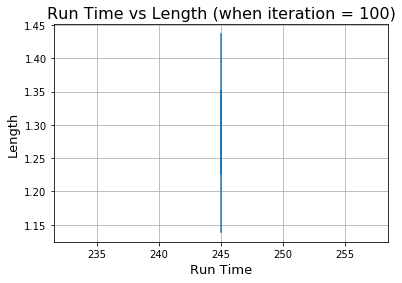

In [272]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [float(x) for x in result_100.keys()]
y = [len(y) for y in result_100.values()]

fig, ax = plt.subplots()
ax.set_title("Run Time vs Length (when iteration = 100)", fontsize='16')
ax.plot(y, x)
# plt.set_title('Run Time Between Three Functions')
ax.xaxis.set_label_text("Run Time",fontsize='13')
ax.yaxis.set_label_text("Length",fontsize='13')
plt.grid()
plt.show()

In [182]:
# if __name__ == "__main__":
#     grid = [[0,1,1,1,0,0],
#             [0,0,0,0,0,0],
#             [0,1,1,1,0,0],
#             [0,1,1,1,0,0],
#             [0,1,1,1,0,0]]
#     start = [0,0]
#     end = [4,4]
#     cost = 1
#     final_result = {}
#     n_row,n_col = np.shape(grid)
#     maze = [[0 for j in range(n_row)]for i in range(n_col)]
#     blank_route = blank_space_a_star(maze,start,end,cost)
# #     print("blank_route",blank_route)
#     repeated_result = repeated_a_star(grid,start,end,cost,blank_route)
#     print("repeated_a_star",repeated_result)
    

current index 0
time 0.00016736984252929688
current final path [[0, 0], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [2, 4], [3, 4], [4, 4]]
current index 1
time 0.0002529621124267578
current final path [[0, 0], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [2, 4], [3, 4], [4, 4]]
current index 2
time 0.00017690658569335938
current final path [[0, 0], [1, 0], [2, 0], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [2, 4], [3, 4], [4, 4]]
current index 3
time 0.0001690387725830078
current final path [[0, 0], [1, 0], [2, 0], [3, 0], [2, 0], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [2, 4], [3, 4], [4, 4]]
current index 4
time 0.0008130073547363281
current final path [[0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [3, 0], [2, 0], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [2, 4], [3, 4], [4, 4]]
repeated_a_star {0.00016736984252929688: 9, 0.0002529621124267578: 9, 0.00017690658569335938: 11, 0.0001690387725830078: 13, 0.0008130073547363281: 15}


In [ ]:
repeated_result

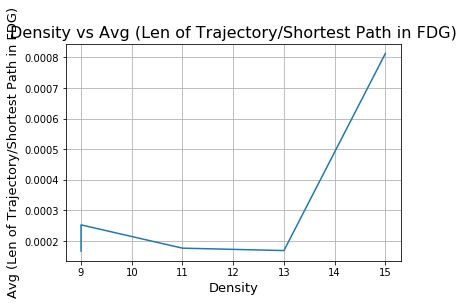

In [184]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [float(x) for x in repeated_result.keys()]
y = [y for y in repeated_result.values()]

fig, ax = plt.subplots()
ax.set_title("Density vs Avg (Len of Trajectory/Shortest Path in FDG)", fontsize='16')
ax.plot(y, x)
# plt.set_title('Run Time Between Three Functions')
ax.xaxis.set_label_text("Density",fontsize='13')
ax.yaxis.set_label_text("Avg (Len of Trajectory/Shortest Path in FDG)",fontsize='13')
plt.grid()
plt.show()